In [2]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from fastestimator.architecture.unet import unet
from fastestimator.dataset import cub200
from fastestimator.estimator.estimator import Estimator
from fastestimator.estimator.trace import Dice
from fastestimator.pipeline.dynamic.preprocess import (AbstractPreprocessing,
                                                       ImageReader, MatReader,
                                                       Resize)
from fastestimator.pipeline.pipeline import Pipeline
from fastestimator.pipeline.static.preprocess import Minmax, Reshape

In [3]:
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
pd.set_option('display.max_colwidth', 600)

In [4]:
import dis

## Download data

In [ ]:
# cub200.load_data('/data/hsiming/Downloads/cub200/data/')

In [6]:
csv_path = '/tmp/CUB200/cub200.csv'
path = '/tmp/CUB200'

In [7]:
class SelectKey(AbstractPreprocessing):
    def transform(self, data, feature=None):
        data = data['seg']
        return data

In [33]:
def my_func1(x):
    return pow(x, 6)

In [36]:
dis.dis(my_func1)

  2           0 LOAD_GLOBAL              0 (pow)
              2 LOAD_FAST                0 (x)
              4 LOAD_CONST               1 (6)
              6 CALL_FUNCTION            2
              8 RETURN_VALUE


In [37]:
dis.dis(Pipeline)

Disassembly of __init__:
 43           0 LOAD_FAST                1 (batch_size)
              2 LOAD_FAST                0 (self)
              4 STORE_ATTR               0 (batch_size)

 44           6 LOAD_FAST                5 (train_data)
              8 LOAD_FAST                0 (self)
             10 STORE_ATTR               1 (train_data)

 45          12 LOAD_FAST                2 (feature_name)
             14 LOAD_FAST                0 (self)
             16 STORE_ATTR               2 (feature_name)

 46          18 LOAD_FAST                3 (transform_train)
             20 LOAD_FAST                0 (self)
             22 STORE_ATTR               3 (transform_train)

 47          24 LOAD_FAST                4 (transform_dataset)
             26 LOAD_FAST                0 (self)
             28 STORE_ATTR               4 (transform_dataset)

 48          30 LOAD_FAST                6 (validation_data)
             32 LOAD_FAST                0 (self)
             34 STORE

In [26]:
dis.dis('2**64')

  1           0 LOAD_CONST               2 (18446744073709551616)
              2 RETURN_VALUE


In [21]:
dis.dis('pow(2, 63)')

  1           0 LOAD_NAME                0 (pow)
              2 LOAD_CONST               0 (2)
              4 LOAD_CONST               1 (63)
              6 CALL_FUNCTION            2
              8 RETURN_VALUE


In [9]:
pipeline = Pipeline(
        batch_size=64,
        feature_name=["image", "annotation"],
        train_data=csv_path,
        validation_data=0.2,
        transform_dataset=[
            [ImageReader(parent_path=path),
             Resize((128, 128), keep_ratio=True)],
            [MatReader(parent_path=path), SelectKey(), Resize((128, 128), keep_ratio=True)]
        ],
        transform_train=[[Reshape((128, 128, 3)), Minmax()], [Reshape((128, 128, 1))]])

In [10]:
dis.dis(pipeline.show_batches(inputs='/tmp/FE_CUB200/tfrecords/', num_batches=10))

FastEstimator: Saving tfrecord to /tmp/FE_CUB200/tfrecords/
FastEstimator: --Converting Eval TFRecords 0.000000%--
FastEstimator: --Converting Eval TFRecords 4.966887%--
FastEstimator: --Converting Eval TFRecords 9.933775%--
FastEstimator: --Converting Eval TFRecords 14.900662%--
FastEstimator: --Converting Eval TFRecords 19.867550%--
FastEstimator: --Converting Eval TFRecords 24.834437%--
FastEstimator: --Converting Eval TFRecords 29.801325%--
FastEstimator: --Converting Eval TFRecords 34.768212%--
FastEstimator: --Converting Eval TFRecords 39.735099%--
FastEstimator: --Converting Eval TFRecords 44.701987%--
FastEstimator: --Converting Eval TFRecords 49.668874%--
FastEstimator: --Converting Eval TFRecords 54.635762%--
FastEstimator: --Converting Eval TFRecords 59.602649%--
FastEstimator: --Converting Eval TFRecords 64.569536%--
FastEstimator: --Converting Eval TFRecords 69.536424%--
FastEstimator: --Converting Eval TFRecords 74.503311%--
FastEstimator: --Converting Eval TFRecords 79.4

TypeError: don't know how to disassemble list objects

In [13]:
batch_data = pipeline.show_batches(inputs='/tmp/FE_CUB200/tfrecords/', num_batches=10)

FastEstimator: Saving tfrecord to /tmp/FE_CUB200/tfrecords/
FastEstimator: --Converting Eval TFRecords 0.000000%--
FastEstimator: --Converting Eval TFRecords 4.966887%--
FastEstimator: --Converting Eval TFRecords 9.933775%--
FastEstimator: --Converting Eval TFRecords 14.900662%--
FastEstimator: --Converting Eval TFRecords 19.867550%--
FastEstimator: --Converting Eval TFRecords 24.834437%--
FastEstimator: --Converting Eval TFRecords 29.801325%--
FastEstimator: --Converting Eval TFRecords 34.768212%--
FastEstimator: --Converting Eval TFRecords 39.735099%--
FastEstimator: --Converting Eval TFRecords 44.701987%--
FastEstimator: --Converting Eval TFRecords 49.668874%--
FastEstimator: --Converting Eval TFRecords 54.635762%--
FastEstimator: --Converting Eval TFRecords 59.602649%--
FastEstimator: --Converting Eval TFRecords 64.569536%--
FastEstimator: --Converting Eval TFRecords 69.536424%--
FastEstimator: --Converting Eval TFRecords 74.503311%--
FastEstimator: --Converting Eval TFRecords 79.4

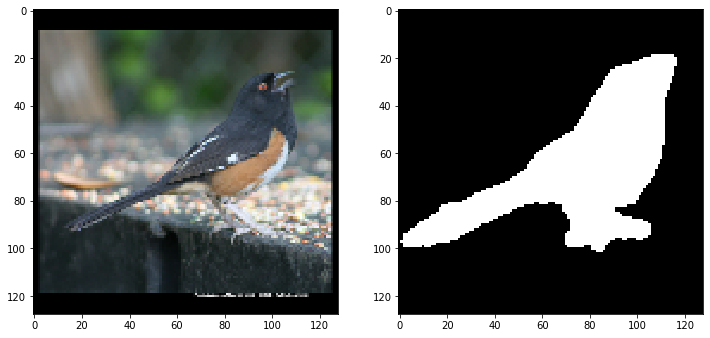

In [18]:
fig, ax = plt.subplots(1, 2)
width = 12 # inches
aspect_ratio = 1
height = width / aspect_ratio
fig.set_size_inches(width, height)
ax[0].imshow(batch_data[1]['image'].numpy()[0, ..., ::-1])
ax[1].imshow(255*np.squeeze(batch_data[1]['annotation'].numpy()[0, ...]), cmap='gray')
plt.show()

In [ ]:
# np.unique(np.squeeze(batch_data[0]['annotation'].numpy()[0, ...]))

In [ ]:
class Network:
    def __init__(self):
        self.model = unet("image", "annotation")
        self.optimizer = tf.optimizers.Adam(learning_rate=0.0001)
        self.loss = tf.losses.BinaryCrossentropy()

    def train_op(self, batch):
        with tf.GradientTape() as tape:
            predictions = self.model(batch["image"])
            loss = self.loss(batch["annotation"], predictions)
        gradients = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.model.trainable_variables))
        return predictions, loss

    def eval_op(self, batch):
        predictions = self.model(batch["image"], training=False)
        loss = self.loss(batch["annotation"], predictions)
        return predictions, loss

In [ ]:
def get_estimator():
    traces = [Dice(y_true_key="annotation")]

    estimator = Estimator(network=Network(),
                          pipeline=pipeline,
                          epochs=2000,
                          steps_per_epoch=10,
                          validation_steps=1,
                          log_steps=10,
                          traces=traces)
    return estimator

In [ ]:
estimator = get_estimator()

In [ ]:
estimator.fit(inputs='/data/hsiming/Downloads/cub200/tfrecords/')